In [28]:
#import modules and packages

import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import sklearn.tree

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


In [29]:
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')
#see only one time warning
#warnings.filterwarnings(action='once')

In [30]:
#import data

df = pd.read_csv('Officer_Traffic_Stops.csv')

# <div class = "alert alert-block alert-success"> DATA DESCRIPTION</div>

## Traffic Stops in Charlotte, North Carolina 2016-2017

In this data set is information gathered about traffic stops and violations in Charlotte, North Carolina each month in 2016 and 2017. This data set offers insight into common trends and patterns that contribute to traffic stops in Charlotte. Each entry in the data set represents one individual traffic stop during that month and year and gives us the following information:
* Driver and Officer Race
* Driver and Officer Gender
* Driver Age
* Driver Ethnicity
* Officer Experience (Years)
* Reason for stop
* Result of Stop
* Search Conducted

For the cleaned up version of this data set, 1.0 represents True for the 'Searched' column and all of the various Reason and Result, and Race columns, and 1.0 represents Male for the gender columns.

* 1.0 = True/Male
* 0.0 = False/Female
 


In [31]:
df.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop
0,2017/08,Vehicle Regulatory,White,Male,2,Black,Non-Hispanic,Male,25,No,Citation Issued
1,2017/08,Vehicle Regulatory,White,Male,2,White,Non-Hispanic,Male,25,No,Citation Issued
2,2017/08,Speeding,Hispanic/Latino,Male,6,Black,Non-Hispanic,Male,54,No,Verbal Warning
3,2017/08,Speeding,Hispanic/Latino,Male,6,Black,Non-Hispanic,Male,25,No,Verbal Warning
4,2017/08,Vehicle Regulatory,Hispanic/Latino,Male,2,Black,Non-Hispanic,Male,26,No,Citation Issued


In [32]:
#finding the length of the dataframe

len1 = len(df)
len1

78272

## <div class="alert alert-block alert-info"> DATA CLEANING </div>

In [33]:
#listing all columns

df.columns

Index(['Month_of_Stop', 'Reason_for_Stop', 'Officer_Race', 'Officer_Gender',
       'Officer_Years_of_Service', 'Driver_Race', 'Driver_Ethnicity',
       'Driver_Gender', 'Driver_Age', 'Was_a_Search_Conducted',
       'Result_of_Stop'],
      dtype='object')

In [34]:
#renaming columns

df.rename(columns = {'Month_of_Stop':'Year_Month', 'Officer_Years_of_Service':'Officer_Experience',\
                     'Reason_for_Stop':'Reason', 'Was_a_Search_Conducted':'Searched','Result_of_Stop'\
                     :'Result', 'Driver_Ethnicity':'Driver_Hispanic'}, inplace=True)

In [35]:
#set 'Year_Month' as index

df = df.set_index('Year_Month')

In [36]:
#checking index

df.head()

,Reason,Officer_Race,Officer_Gender,Officer_Experience,Driver_Race,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Result
Year_Month,,,,,,,,,,
2017/08,Vehicle Regulatory,White,Male,2,Black,Non-Hispanic,Male,25,No,Citation Issued
2017/08,Vehicle Regulatory,White,Male,2,White,Non-Hispanic,Male,25,No,Citation Issued
2017/08,Speeding,Hispanic/Latino,Male,6,Black,Non-Hispanic,Male,54,No,Verbal Warning
2017/08,Speeding,Hispanic/Latino,Male,6,Black,Non-Hispanic,Male,25,No,Verbal Warning
2017/08,Vehicle Regulatory,Hispanic/Latino,Male,2,Black,Non-Hispanic,Male,26,No,Citation Issued


In [37]:
#NaN check

df.isna().any()

Reason                False
Officer_Race          False
Officer_Gender        False
Officer_Experience    False
Driver_Race           False
Driver_Hispanic       False
Driver_Gender         False
Driver_Age            False
Searched              False
Result                False
dtype: bool

In [38]:
#check for blank values

for c in df.columns:
    print(c, ": ", df.groupby(c).size().index == ' ')

Reason :  [False False False False False False False False False False]
Officer_Race :  [ True False False False False False False False False]
Officer_Gender :  [False False]
Officer_Experience :  False
Driver_Race :  [False False False False False]
Driver_Hispanic :  [False False]
Driver_Gender :  [False False]
Driver_Age :  False
Searched :  [False False]
Result :  [False False False False False]


In [39]:
#groupby Officer_Race to find the size of each to find how many rows are blank

df.groupby('Officer_Race').size()

Officer_Race
                                    338
2 or More                            80
American Indian/Alaska Native       215
Asian / Pacific Islander           4620
Black/African American            13194
Hispanic/Latino                    3468
Native Hawaiian/Oth Pac Island       69
Not Specified                       647
White                             55641
dtype: int64

In [40]:
#removing all Officer_Race inputs that are blank

df = df[df.Officer_Race != ' ']

In [41]:
#checking

df.groupby('Officer_Race').size()

Officer_Race
2 or More                            80
American Indian/Alaska Native       215
Asian / Pacific Islander           4620
Black/African American            13194
Hispanic/Latino                    3468
Native Hawaiian/Oth Pac Island       69
Not Specified                       647
White                             55641
dtype: int64

In [42]:
#checking the format of inputs

df.iloc[0].values

array(['Vehicle Regulatory       ', 'White', 'Male', 2, 'Black',
       'Non-Hispanic', 'Male', 25, 'No', 'Citation Issued'], dtype=object)

In [43]:
#removing white space before and after values

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [44]:
#checking the operation

df.iloc[0].values

array(['Vehicle Regulatory', 'White', 'Male', 2, 'Black', 'Non-Hispanic',
       'Male', 25, 'No', 'Citation Issued'], dtype=object)

In [45]:
#finding the unique values of each column

for c in df.columns:
    print(c + ': ' + str(df[c].nunique()) )

Reason: 10
Officer_Race: 8
Officer_Gender: 2
Officer_Experience: 31
Driver_Race: 5
Driver_Hispanic: 2
Driver_Gender: 2
Driver_Age: 86
Searched: 2
Result: 5


In [46]:
#finding length of dataframe

len2 = len(df)
len2

77934

In [47]:
#finding total dropped rows

len_diff = len1 - len2
len_diff

338

In [48]:
#find percentage of dropped rows

print("Dropped", round(((len_diff/len1)*100),2),"%")

Dropped 0.43 %


In [49]:
#create seperate data set for machine learning process

dfML = df.copy()

In [50]:
#checking data

dfML.head(1)

,Reason,Officer_Race,Officer_Gender,Officer_Experience,Driver_Race,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Result
Year_Month,,,,,,,,,,
2017/08,Vehicle Regulatory,White,Male,2,Black,Non-Hispanic,Male,25,No,Citation Issued


In [51]:
#replace yes and no with 1 and 0

dfML.replace(to_replace='Yes', value=1.0, inplace=True)
dfML.replace(to_replace='No', value=0.0, inplace=True)

In [52]:
#checking the replace

dfML.head(1)

,Reason,Officer_Race,Officer_Gender,Officer_Experience,Driver_Race,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Result
Year_Month,,,,,,,,,,
2017/08,Vehicle Regulatory,White,Male,2,Black,Non-Hispanic,Male,25,0.0,Citation Issued


In [53]:
#replace male and female with 1 and 0

dfML.replace(to_replace='Male', value=1.0, inplace=True)
dfML.replace(to_replace='Female', value=0.0, inplace=True)

In [54]:
#checking the replace

dfML.head(1)

,Reason,Officer_Race,Officer_Gender,Officer_Experience,Driver_Race,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Result
Year_Month,,,,,,,,,,
2017/08,Vehicle Regulatory,White,1.0,2,Black,Non-Hispanic,1.0,25,0.0,Citation Issued


In [55]:
#replace hispanic and non-hispanic with 1 and 0

dfML.replace(to_replace='Hispanic', value=1.0, inplace=True)
dfML.replace(to_replace='Non-Hispanic', value=0.0, inplace=True)

In [56]:
#checking the replace

dfML.head(1)

,Reason,Officer_Race,Officer_Gender,Officer_Experience,Driver_Race,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Result
Year_Month,,,,,,,,,,
2017/08,Vehicle Regulatory,White,1.0,2,Black,0.0,1.0,25,0.0,Citation Issued


In [57]:
#create dummy variables

DumbDF = pd.get_dummies(dfML, columns=['Reason','Result', 'Driver_Race', 'Officer_Race'])
DumbDF.head()

,Officer_Gender,Officer_Experience,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Reason_CheckPoint,Reason_Driving While Impaired,Reason_Investigation,Reason_Other,...,Driver_Race_Other/Unknown,Driver_Race_White,Officer_Race_2 or More,Officer_Race_American Indian/Alaska Native,Officer_Race_Asian / Pacific Islander,Officer_Race_Black/African American,Officer_Race_Hispanic/Latino,Officer_Race_Native Hawaiian/Oth Pac Island,Officer_Race_Not Specified,Officer_Race_White
Year_Month,,,,,,,,,,,,,,,,,,,,,
2017/08,1.0,2,0.0,1.0,25,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017/08,1.0,2,0.0,1.0,25,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2017/08,1.0,6,0.0,1.0,54,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017/08,1.0,6,0.0,1.0,25,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017/08,1.0,2,0.0,1.0,26,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
#validating columns

DumbDF.columns

Index(['Officer_Gender', 'Officer_Experience', 'Driver_Hispanic',
       'Driver_Gender', 'Driver_Age', 'Searched', 'Reason_CheckPoint',
       'Reason_Driving While Impaired', 'Reason_Investigation', 'Reason_Other',
       'Reason_Safe Movement', 'Reason_SeatBelt', 'Reason_Speeding',
       'Reason_Stop Light/Sign', 'Reason_Vehicle Equipment',
       'Reason_Vehicle Regulatory', 'Result_Arrest', 'Result_Citation Issued',
       'Result_No Action Taken', 'Result_Verbal Warning',
       'Result_Written Warning', 'Driver_Race_Asian', 'Driver_Race_Black',
       'Driver_Race_Native American', 'Driver_Race_Other/Unknown',
       'Driver_Race_White', 'Officer_Race_2 or More',
       'Officer_Race_American Indian/Alaska Native',
       'Officer_Race_Asian / Pacific Islander',
       'Officer_Race_Black/African American', 'Officer_Race_Hispanic/Latino',
       'Officer_Race_Native Hawaiian/Oth Pac Island',
       'Officer_Race_Not Specified', 'Officer_Race_White'],
      dtype='object')

In [59]:
#renaming dummy columns

DumbDF.rename(columns = {'Result_Citation Issued':'Result_Citation_Issued', 'Reason_Driving While Impaired':\
                         'Reason_Driving_Impaired','Reason_Safe Movement':'Reason_Safe_Movement',\
                         'Reason_Stop Light/Sign':'Reason_Stop_Light/Sign','Reason_Vehicle Equipment'\
                         :'Reason_Vehicle_Equipment', 'Reason_Vehicle Regulatory':'Reason_Vehicle_Regulatory',\
                         'Result_No Action Taken':'Result_No_Action_Taken', 'Result_Verbal Warning':\
                         'Result_Verbal_Warning', 'Result_Written Warning':'Result_Written_Warning',\
                         'Driver_Race_Native American':'Driver_Race_Native_American', 'Officer_Race_2 or More':\
                         'Officer_Race_2+', 'Officer_Race_American Indian/Alaska Native':\
                         'Officer_Race_Native_American', 'Officer_Race_Asian / Pacific Islander':\
                         'Officer_Race_Asian', 'Officer_Race_Black/African American':'Officer_Race_Black',\
                         'Officer_Race_Native Hawaiian/Oth Pac Island':'Officer_Race_Hawaiian',\
                         'Officer_Race_Not Specified':'Officer_Race_Not_Specified'
                        }, inplace=True)

In [60]:
#validating the rename

DumbDF.head()

,Officer_Gender,Officer_Experience,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Reason_CheckPoint,Reason_Driving_Impaired,Reason_Investigation,Reason_Other,...,Driver_Race_Other/Unknown,Driver_Race_White,Officer_Race_2+,Officer_Race_Native_American,Officer_Race_Asian,Officer_Race_Black,Officer_Race_Hispanic/Latino,Officer_Race_Hawaiian,Officer_Race_Not_Specified,Officer_Race_White
Year_Month,,,,,,,,,,,,,,,,,,,,,
2017/08,1.0,2,0.0,1.0,25,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017/08,1.0,2,0.0,1.0,25,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2017/08,1.0,6,0.0,1.0,54,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017/08,1.0,6,0.0,1.0,25,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017/08,1.0,2,0.0,1.0,26,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
#setting dfML equal to the DumbDF

dfML = DumbDF

In [62]:
#Checking for NaN values

dfML.isna().sum()

Officer_Gender                  0
Officer_Experience              0
Driver_Hispanic                 0
Driver_Gender                   0
Driver_Age                      0
Searched                        0
Reason_CheckPoint               0
Reason_Driving_Impaired         0
Reason_Investigation            0
Reason_Other                    0
Reason_Safe_Movement            0
Reason_SeatBelt                 0
Reason_Speeding                 0
Reason_Stop_Light/Sign          0
Reason_Vehicle_Equipment        0
Reason_Vehicle_Regulatory       0
Result_Arrest                   0
Result_Citation_Issued          0
Result_No_Action_Taken          0
Result_Verbal_Warning           0
Result_Written_Warning          0
Driver_Race_Asian               0
Driver_Race_Black               0
Driver_Race_Native_American     0
Driver_Race_Other/Unknown       0
Driver_Race_White               0
Officer_Race_2+                 0
Officer_Race_Native_American    0
Officer_Race_Asian              0
Officer_Race_B

In [63]:
#checking column names

dfML.columns

Index(['Officer_Gender', 'Officer_Experience', 'Driver_Hispanic',
       'Driver_Gender', 'Driver_Age', 'Searched', 'Reason_CheckPoint',
       'Reason_Driving_Impaired', 'Reason_Investigation', 'Reason_Other',
       'Reason_Safe_Movement', 'Reason_SeatBelt', 'Reason_Speeding',
       'Reason_Stop_Light/Sign', 'Reason_Vehicle_Equipment',
       'Reason_Vehicle_Regulatory', 'Result_Arrest', 'Result_Citation_Issued',
       'Result_No_Action_Taken', 'Result_Verbal_Warning',
       'Result_Written_Warning', 'Driver_Race_Asian', 'Driver_Race_Black',
       'Driver_Race_Native_American', 'Driver_Race_Other/Unknown',
       'Driver_Race_White', 'Officer_Race_2+', 'Officer_Race_Native_American',
       'Officer_Race_Asian', 'Officer_Race_Black',
       'Officer_Race_Hispanic/Latino', 'Officer_Race_Hawaiian',
       'Officer_Race_Not_Specified', 'Officer_Race_White'],
      dtype='object')

In [64]:
#structure of shape

dfML.shape

(77934, 34)

In [65]:
#original df shape

df.shape

(77934, 10)

# <div class="alert alert-block alert-info"> DATA FINDINGS </div>

## <div class="alert alert-block alert-success"> DATA FINDING #1 </div>

we want to use clustering to find a relationship between officer experience and driver race on arrests

In [66]:
#3 clusters

from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3, random_state=0)
clu.fit(dfML)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [67]:
#cluster labels (0-2)

clu.labels_

array([2, 2, 1, ..., 2, 2, 2], dtype=int32)

In [68]:
#setting df2 equal to dfML and adding cluster as column

df2=pd.DataFrame.copy(dfML)
df2['cluster'] = clu.labels_
df2.groupby('cluster').mean()

,Officer_Gender,Officer_Experience,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Reason_CheckPoint,Reason_Driving_Impaired,Reason_Investigation,Reason_Other,...,Driver_Race_Other/Unknown,Driver_Race_White,Officer_Race_2+,Officer_Race_Native_American,Officer_Race_Asian,Officer_Race_Black,Officer_Race_Hispanic/Latino,Officer_Race_Hawaiian,Officer_Race_Not_Specified,Officer_Race_White
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.944186,20.370909,0.120582,0.537829,30.389392,0.015969,0.004974,0.001361,0.024399,0.032672,...,0.037332,0.446673,0.000000,0.001361,0.077439,0.178596,0.016702,0.000000,0.004712,0.721190
1,0.914005,10.879141,0.067581,0.595659,52.553164,0.018963,0.002193,0.001416,0.019922,0.023623,...,0.025040,0.455198,0.000960,0.002422,0.060498,0.180169,0.041444,0.000457,0.006306,0.707745
2,0.898539,5.385007,0.112612,0.607524,28.392585,0.074127,0.003708,0.001434,0.023681,0.017754,...,0.029093,0.337185,0.001597,0.003681,0.049175,0.158051,0.060677,0.001597,0.011340,0.713884


In [69]:
#groupby cluster on Black Drivers

df2.groupby('cluster')['Driver_Race_Black'].mean()

cluster
0    0.496571
1    0.498195
2    0.618133
Name: Driver_Race_Black, dtype: float64

In [70]:
#check to see if there are any high correlations for arrests - there are not so no need to drop

df2.corr().loc['Result_Arrest']

Officer_Gender                  0.008185
Officer_Experience             -0.050964
Driver_Hispanic                 0.001135
Driver_Gender                   0.060841
Driver_Age                     -0.051141
Searched                        0.442931
Reason_CheckPoint               0.010870
Reason_Driving_Impaired         0.196318
Reason_Investigation            0.110723
Reason_Other                    0.023947
Reason_Safe_Movement            0.003958
Reason_SeatBelt                 0.001505
Reason_Speeding                -0.051033
Reason_Stop_Light/Sign         -0.017781
Reason_Vehicle_Equipment        0.012679
Reason_Vehicle_Regulatory      -0.011265
Result_Arrest                   1.000000
Result_Citation_Issued         -0.113568
Result_No_Action_Taken         -0.021492
Result_Verbal_Warning          -0.154204
Result_Written_Warning         -0.032934
Driver_Race_Asian              -0.009086
Driver_Race_Black               0.045988
Driver_Race_Native_American    -0.003826
Driver_Race_Othe

In [71]:
#create df3 and define inexperienced cop as having less than 10 years of service

df3= df2.copy()
df3['Inexperienced']=(df3['Officer_Experience']<=10.0)
df3['Black_Driver']=(df3['Driver_Race_Black']>=.5)
df3.groupby(['Inexperienced','Black_Driver']).agg({'Result_Arrest' : ['size', 'mean'], 'Result_No_Action_Taken' : ['size', 'mean']})

Result_Arrest           Result_No_Action_Taken  \
                                    size      mean                   size   
Inexperienced Black_Driver                                                  
False         False                16880  0.009360                  16880   
              True                 15385  0.015275                  15385   
True          False                17827  0.017165                  17827   
              True                 27842  0.032756                  27842   

                                      
                                mean  
Inexperienced Black_Driver            
False         False         0.019491  
              True          0.022814  
True          False         0.020811  
              True          0.022197

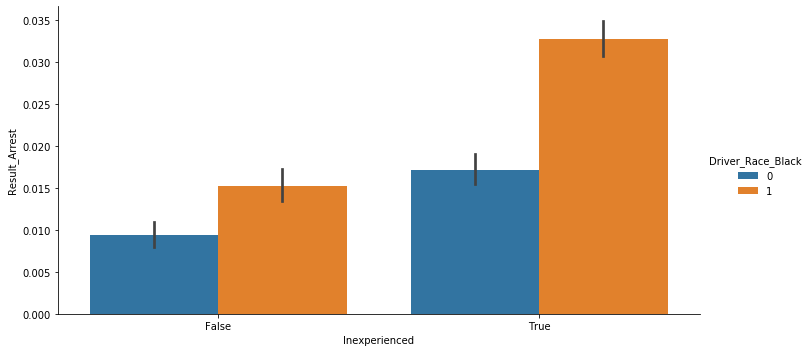

In [72]:
#bar plot

sns.catplot(x='Inexperienced', y='Result_Arrest', hue='Driver_Race_Black', data=df3, kind='bar', aspect=2)

In [73]:
#adding a binned_age column to work with

df3['binned_experience'] = pd.cut(df2.Officer_Experience,bins=[0,10,100])

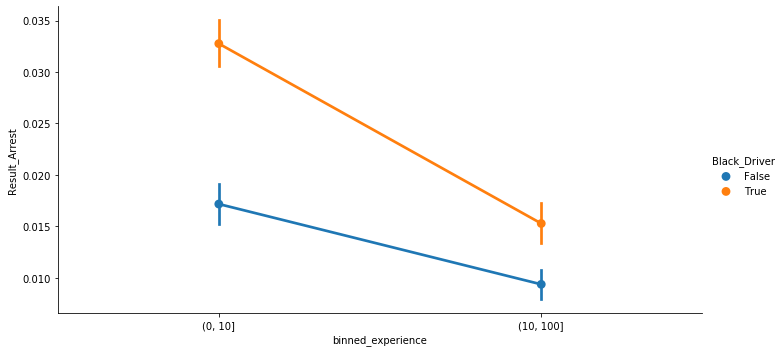

In [74]:
#point plot

sns.catplot(x='binned_experience', y='Result_Arrest', \
            hue='Black_Driver', kind='point', data=df3, aspect=2)

In [75]:
#Comparison
t1 = df3.groupby(['Inexperienced','Black_Driver'])\
.agg({'Result_Arrest' : ['size', 'mean'], 'Result_No_Action_Taken' : ['size', 'mean']})

t1

Inex_Black = t1.values[3][1]
Inex_Other = t1.values[2][1] 

Ex_Black = t1.values[1][1]
Ex_Other = t1.values[0][1]


print('Inexperienced:',round(((((Inex_Black - Inex_Other)/Inex_Other)*100)),2),"%",'Higher')
print('Experienced:',round(((((Ex_Black - Ex_Other)/Ex_Other)*100)),2),"%",'Higher')

Result_Arrest           Result_No_Action_Taken  \
                                    size      mean                   size   
Inexperienced Black_Driver                                                  
False         False                16880  0.009360                  16880   
              True                 15385  0.015275                  15385   
True          False                17827  0.017165                  17827   
              True                 27842  0.032756                  27842   

                                      
                                mean  
Inexperienced Black_Driver            
False         False         0.019491  
              True          0.022814  
True          False         0.020811  
              True          0.022197

Inexperienced: 90.83 % Higher
Experienced: 63.19 % Higher


## <div class = "alert alert-block alert-warning"> **Summary of Findings** </div>

### An inexperienced cop is about twice as likely to arrest a Black driver than a non-Black driver.

## <div class="alert alert-block alert-info"> Managerial Insight </div>

### This trend might be explained by inexperienced officers racially profiling Black drivers. Since the disparity is so large the police department should incorporate more diversity training sessions for their inexperienced police officers or pair those inexperienced police officers with experienced ones when they are on duty to help reduce racial bias for the traffic stops.

## <div class="alert alert-block alert-success"> DATA FINDING #2 </div>

In [76]:
#3 clusters

from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3, random_state=0)
clu.fit(dfML)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [77]:
#first 20 labels

clu.labels_[:20]

array([2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2],
      dtype=int32)

In [78]:
#add cluster to df2 and groupby 

df2=pd.DataFrame.copy(dfML)
df2['cluster'] = clu.labels_
df2.groupby('cluster').mean()

,Officer_Gender,Officer_Experience,Driver_Hispanic,Driver_Gender,Driver_Age,Searched,Reason_CheckPoint,Reason_Driving_Impaired,Reason_Investigation,Reason_Other,...,Driver_Race_Other/Unknown,Driver_Race_White,Officer_Race_2+,Officer_Race_Native_American,Officer_Race_Asian,Officer_Race_Black,Officer_Race_Hispanic/Latino,Officer_Race_Hawaiian,Officer_Race_Not_Specified,Officer_Race_White
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.944186,20.370909,0.120582,0.537829,30.389392,0.015969,0.004974,0.001361,0.024399,0.032672,...,0.037332,0.446673,0.000000,0.001361,0.077439,0.178596,0.016702,0.000000,0.004712,0.721190
1,0.914005,10.879141,0.067581,0.595659,52.553164,0.018963,0.002193,0.001416,0.019922,0.023623,...,0.025040,0.455198,0.000960,0.002422,0.060498,0.180169,0.041444,0.000457,0.006306,0.707745
2,0.898539,5.385007,0.112612,0.607524,28.392585,0.074127,0.003708,0.001434,0.023681,0.017754,...,0.029093,0.337185,0.001597,0.003681,0.049175,0.158051,0.060677,0.001597,0.011340,0.713884


In [79]:
#add column for young drivers and groupby Black and Young drivers and look at the rate they were searched

df3= df2.copy()
df3['Hispanic_Driver']=(df3['Driver_Hispanic']>=.5)
df3['Black_Driver']=(df3['Driver_Race_Black']>=.5)
df3['Young_Driver']=(df3['Driver_Age']<=20)
df3.groupby(['Hispanic_Driver', 'Young_Driver']).agg({'Searched' : ['size', 'mean'], 'Result_No_Action_Taken' : ['size', 'mean']})

Searched           Result_No_Action_Taken  \
                                 size      mean                   size   
Hispanic_Driver Young_Driver                                             
False           False           65040  0.042482                  65040   
                True             4951  0.080590                   4951   
True            False            6860  0.029883                   6860   
                True             1083  0.084949                   1083   

                                        
                                  mean  
Hispanic_Driver Young_Driver            
False           False         0.021740  
                True          0.023228  
True            False         0.017638  
                True          0.017544

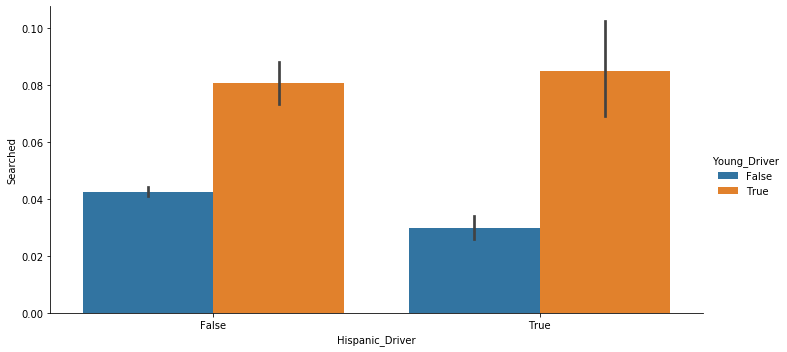

In [80]:
#bar plot

sns.catplot(x='Hispanic_Driver', y='Searched', hue='Young_Driver', data=df3, kind='bar', aspect=2)

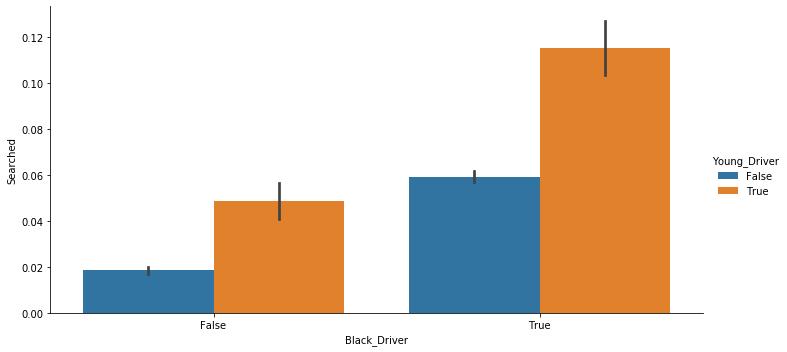

In [81]:
#point plot

sns.catplot(x='Black_Driver', y='Searched', \
            hue='Young_Driver', kind='bar', data=df3, aspect=2)

## <div class = "alert alert-block alert-warning"> **Summary of Findings** </div>

### Young drivers are about 2x more likely to be searched in general. Black young driver is about 2x more likely than a non-Black  young driver whereas a young hispanic driver is searched at the same rate as a non-hispanic driver.

## <div class="alert alert-block alert-info"> Managerial Insight </div>

### We should look to incorporate more educational lessons and requirements regarding traffic laws and safety for drivers getting their licenses since young drivers are being searched two times more than older drivers which indicates younger drivers might not be as disciplined and educated about traffic and driving laws. It is also interesting to note that hispanic drivers are not searched at an increased rate like black drivers are. With that we should also look to incorporate diversity training to eliminate racial biases towards Black drivers over non-Black drivers as it appears to possibly be a factor when they are twice more likely to be searched by police officers.

## <div class="alert alert-block alert-success"> DATA FINDING #3 </div>

### We want to use a regression decision tree to figure out the average officer experience based on what reason they pull a driver over and what the result of that traffic stop is

In [82]:
#dependent variable is officer experience
X = dfML.drop('Officer_Experience',axis=1)

Y = dfML.Officer_Experience

In [83]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

In [84]:
#fit the X and Y to the decision tree
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

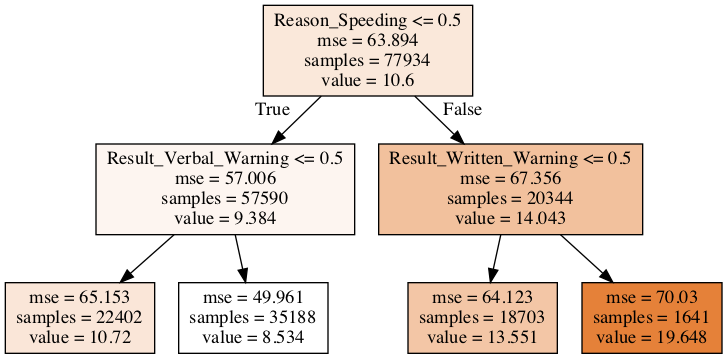

In [85]:
#print out the decision tree

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### This decision tree shows that less experienced officers give more verbal warnings

In [96]:
#we want to create a new dataframe and groupby to support the tree more clearly

dfS = df[(df.Result == 'Verbal Warning') | (df.Result == 'Written Warning')]

In [130]:
#check the condition above 

dfS.Result.unique()

array(['Verbal Warning', 'Written Warning'], dtype=object)

In [131]:
# create new column for speeding

dfS['Speeding'] = dfS.Reason == 'Speeding'

In [132]:
#groupby new dataframe

dfS1 = dfS.groupby(['Speeding', 'Result'])['Officer_Experience'].mean()
dfS1

Speeding  Result         
False     Verbal Warning      8.534159
          Written Warning    14.083026
True      Verbal Warning     12.058872
          Written Warning    19.647776
Name: Officer_Experience, dtype: float64

In [128]:
#for speeding traffic stops, find the percent difference in age for verbal vs written warnings

print('The percent change for non-speeding traffic stops: '+ str(((dfS1.iloc[1]-dfS1.iloc[0])/dfS1.iloc[0])*100))
print('The percent change for speeding traffic stops: '+ str(((dfS1.iloc[3]-dfS1.iloc[2])/dfS1.iloc[2])*100))

The percent change for non-speeding traffic stops: 65.01948482022284
The percent change for speeding traffic stops: 62.93212280156772


### The change in officer experience for verbal and written warnings is very significant at over 60% for both speeding and non-speeding violations

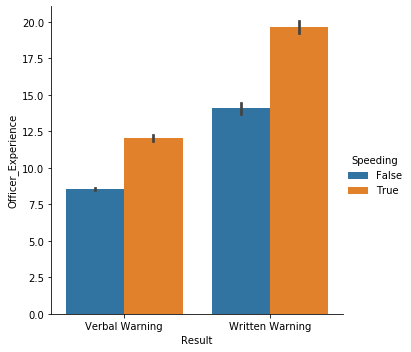

In [129]:
#plot the findings of the decision tree and groupby

sns.catplot(x='Result', y='Officer_Experience',\
            kind='bar',hue='Speeding', data=dfS, aspect=1)

## <div class = "alert alert-block alert-warning"> **Summary of Findings** </div>

### More experienced cops give more written warnings. Less experienced cops give more verbal warnings.

## <div class="alert alert-block alert-info"> Managerial Insight </div>

### Less experienced cops are giving out more verbal warnings versus written warnings as compared to more experienced officers. You would expect less experienced officers to give more written warnings as they want to test their authority earlier on in their career. But it seems less experienced officers may be letting drivers off too easily and the police department should implement more training and guidelines for less experienced officers to make sure they correctly deal with certain traffic violations.